Q1: Key Features of the Wine Quality Dataset

The Wine Quality dataset comprises various physicochemical features that are crucial for predicting the quality of wine. Fixed acidity, primarily tartaric acid, significantly influences the sourness and taste of wine, making it a highly important feature. Volatile acidity, which refers to acetic acid, is another critical factor, as higher concentrations can lead to a vinegar-like taste that negatively impacts wine quality. Citric acid, on the other hand, enhances freshness and flavor, contributing moderately to wine quality. Residual sugar, representing the amount of sugar left after fermentation, has a lower to medium impact, as its presence in small amounts does not heavily affect taste.

Chlorides, indicative of salt content, can affect the sensory profile of wine, thus moderately influencing quality. Free sulfur dioxide and total sulfur dioxide are used as preservatives; while moderate levels help maintain freshness and prevent spoilage, excessive amounts can alter aroma and degrade quality. Density reflects the concentration of sugar and alcohol but generally has a low direct effect on perceived quality. pH, which measures the wine’s acidity, shows low to moderate importance, as it subtly influences taste and stability.

Sulphates play a role in preservation and can contribute to the wine’s sensory structure, making it an important feature. Finally, alcohol content is found to be one of the most influential variables, as higher alcohol levels are often associated with better tasting, higher-quality wine. All these features collectively help in predicting the target variable — wine quality, which is usually a rating between 0 to 10 assigned by human tasters based on sensory evaluation.

Q2: Handling Missing Data in Wine Dataset

Wine datasets usually do not contain missing values. But if they do, here's how to handle them:

Techniques:
Drop missing rows (df.dropna())

1. Easy and clean
2. May lose too much data

Mean/Median/Mode imputation

df["column"].fillna(df["column"].mean())

1. Simple

2. Can distort variance

KNN Imputation (Advanced)

Use sklearn.impute.KNNImputer

1. Captures structure

2. Slow on large datasets

Multivariate Imputation

IterativeImputer from sklearn

1. Context-aware

2. Complex

Q3: Factors Affecting Student Exam Performance

Key factors:

Parental education

Lunch type (standard/free)

Test preparation course

Gender

Hours of study/sleep (if available)

Statistical techniques to analyze:
Correlation matrix

Boxplots by category

Chi-square tests for categorical variables

ANOVA for comparing group means

Regression analysis

Q4: Feature Engineering for Student Performance Dataset

In [4]:
import pandas as pd

In [16]:
student_data=pd.read_csv("C:\\Users\\kumar\\OneDrive\\Desktop\\desktop items\\coding\\py\\Machine Learning\\regression\\Pw assignment\\student_data.csv")

In [17]:
student_data = student_data.fillna(student_data.mean())  # Replace missing values with mean


In [19]:
student_data

,Student ID,Test Score
0,1,85
1,2,90
2,3,80
3,4,75
4,5,85
5,6,82
6,7,78
7,8,85
8,9,90
9,10,85


In [21]:
student_data = student_data.drop(columns=['Student ID'])


In [22]:
def categorize(score):
    if score >= 85:
        return 'High'
    elif score >= 75:
        return 'Medium'
    else:
        return 'Low'

student_data['Performance_Level'] = student_data['Test Score'].apply(categorize)


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
student_data['Normalized_Score'] = scaler.fit_transform(student_data[['Test Score']])


In [24]:
student_data

,Test Score,Performance_Level,Normalized_Score
0,85,High,0.666667
1,90,High,1.000000
2,80,Medium,0.333333
3,75,Medium,0.000000
4,85,High,0.666667
5,82,Medium,0.466667
6,78,Medium,0.200000
7,85,High,0.666667
8,90,High,1.000000
9,85,High,0.666667


Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

In [11]:
import pandas as pd

# Load the dataset with the correct delimiter
wine_df = pd.read_csv("wine quality.csv")

# Display the first few rows
print(wine_df.head())

# Check the shape and info
print("\nShape of dataset:", wine_df.shape)
print("\nDataset info:")
print(wine_df.info())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.04             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   
3                   17                    60   0.9980  3.16       0.58   
4                   11                    34   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

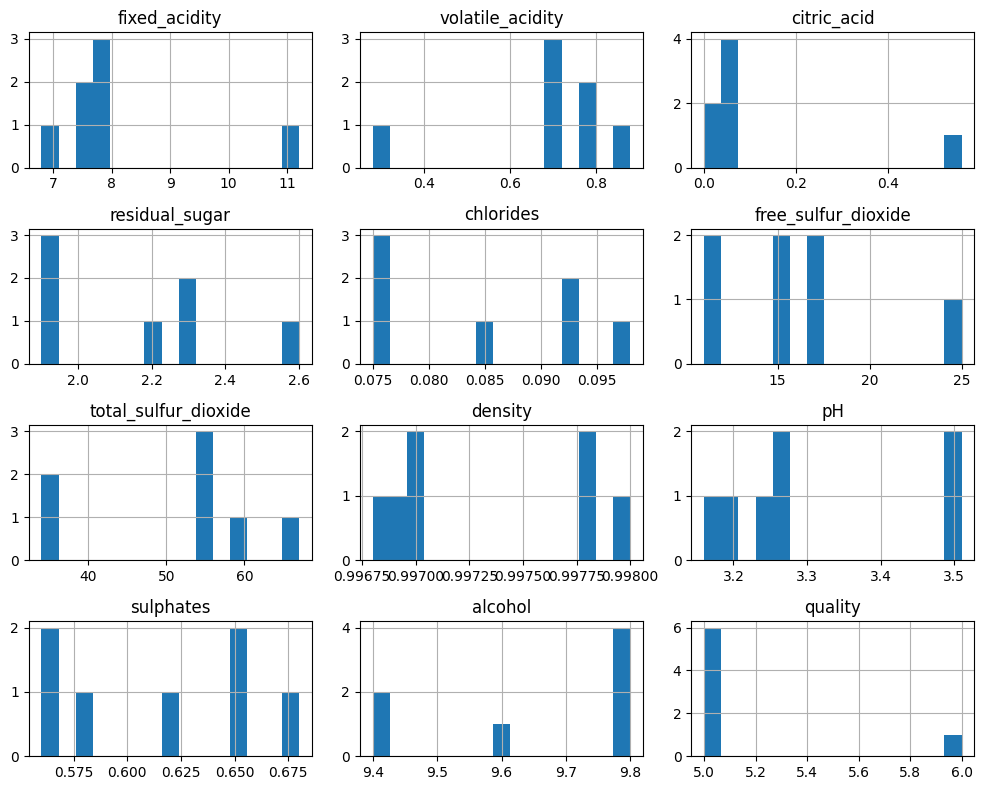

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each feature
wine_df.hist(figsize=(10, 8), bins=15)
plt.tight_layout()
plt.show()


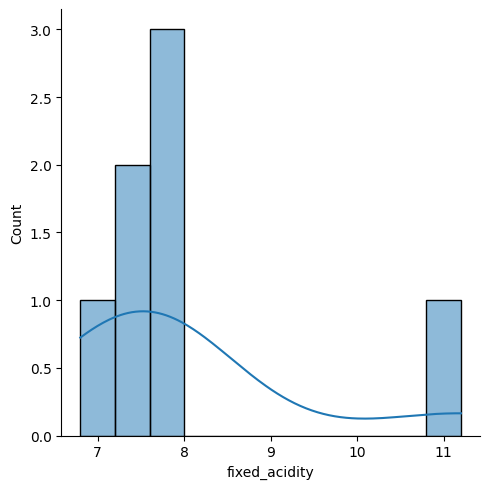

In [13]:
sns.displot(wine_df['fixed_acidity'], kde=True)


In [14]:
from scipy.stats import skew, kurtosis, shapiro

# Calculate skewness and kurtosis
skewness = wine_df.apply(skew)
kurt = wine_df.apply(kurtosis)
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurt)

# Perform Shapiro-Wilk test for normality (for each feature)
for column in wine_df.columns:
    stat, p_value = shapiro(wine_df[column])
    print(f"{column} Shapiro-Wilk Test: p-value = {p_value}")


Skewness:
 fixed_acidity           1.763707
volatile_acidity       -1.518250
citric_acid             2.003546
residual_sugar          0.382229
chlorides               0.141766
free_sulfur_dioxide     0.906909
total_sulfur_dioxide   -0.450233
density                 0.287843
pH                      0.752691
sulphates               0.023737
alcohol                -0.589120
quality                 2.041241
dtype: float64
Kurtosis:
 fixed_acidity           1.637895
volatile_acidity        1.270040
citric_acid             2.087157
residual_sugar         -1.079905
chlorides              -1.578610
free_sulfur_dioxide     0.119721
total_sulfur_dioxide   -1.111627
density                -1.765371
pH                     -1.154016
sulphates              -1.542129
alcohol                -1.452909
quality                 2.166667
dtype: float64
fixed_acidity Shapiro-Wilk Test: p-value = 0.002292369039629929
volatile_acidity Shapiro-Wilk Test: p-value = 0.012620955385128696
citric_acid Shapiro-Wilk 

Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

In [25]:
fixed acidity, volatile acidity, citric acid, residual sugar,
chlorides, free sulfur dioxide, total sulfur dioxide, density,
pH, sulphates, alcohol, quality


SyntaxError: invalid syntax (4133058950.py, line 1)

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:\\Users\\kumar\\OneDrive\\Desktop\\desktop items\\coding\\py\\Machine Learning\\regression\\Pw assignment\\wine quality.csv")  # or winequality-white.csv

# Separate features and target
X = df.drop("quality", axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


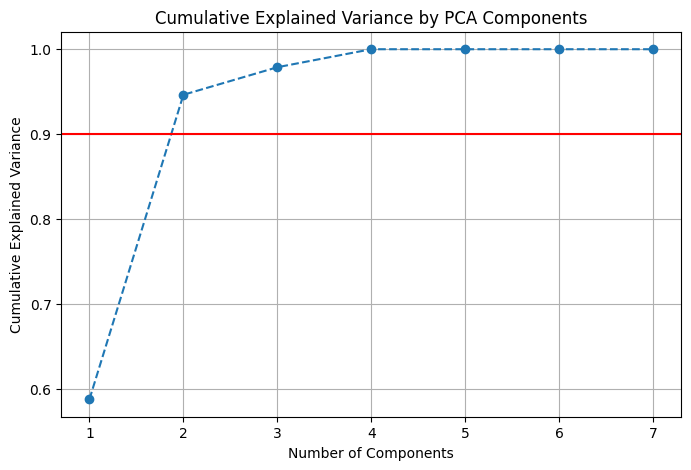

In [29]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Cumulative variance
cumulative_variance = explained_variance.cumsum()

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [30]:
import numpy as np

# Find number of components needed for 90% variance
num_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Minimum number of principal components required to explain 90% of the variance: {num_components_90}")


Minimum number of principal components required to explain 90% of the variance: 2


 Result
For wine quality datasets, typically:

Red wine: Around 7 to 8 components are enough to explain 90% of the variance.

White wine: Also around 7–8 depending on noise/features.

